# Tratamento de dados

## Importar as bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Importar os dados iniciais

In [2]:
data = pd.read_csv('../csv-data/houses_to_rent_v2.csv')
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


## Tratamento de entradas duplicadas

Iremos usar as funções *duplicated* e *value_counts* para procurar por entradas duplicadas no nosso dataset, em caso positivo, iremos usar a função *drop_duplicates* para remover as entradas duplicadas:

In [3]:
data.duplicated().value_counts()

False    10334
True       358
dtype: int64

In [4]:
data.drop_duplicates(inplace=True)
data.duplicated().value_counts()

False    10334
dtype: int64

## Tratamento de colunas com dados qualitativos e dados não numéricos

Podemos notar que as colunas 'city', 'animal' e 'furniture' estão contendo dados qualitativos, para nossos objetivos, precisaremos converter estes dados em dados quantitativos, iremos começar pela coluna 'city'.

Iremos usar a função *get_dummies* do Pandas para converter cada valor qualitativo de 'city' em uma coluna correspondendo ao valor, usando 1 para 'sim' e 0 para 'não, utilizaremos também o prefixo 'city_' para melhor entendimento. Por exemplo, o valor 'Rio de Janeiro' se tornará a coluna 'city_Rio de Janeiro', e poderá ter os valores 1 caso o imóvel esteja localizado na cidade do Rio de Janeiro, ou 0 caso não esteja. Ao final, removeremos a coluna 'city' dos nossos dados, já que não teremos mais utilidade para ela.

In [5]:
data = data.join(pd.get_dummies(data.city, prefix='city')).drop(['city'], axis=1)
data.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo
0,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618,0,0,0,0,1
1,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973,0,0,0,0,1
2,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841,0,0,1,0,0
3,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421,0,0,1,0,0
4,25,1,1,0,1,not acept,not furnished,0,800,25,11,836,0,0,0,0,1


Para as colunas 'animal' e 'furniture' temos apenas valores de 'sim' e 'não', neste caso, podemos apenas transformar esses valores em 1 para 'sim' e 0 para 'não':

In [6]:
data.loc[data.animal == 'acept', 'animal'] = 1
data.loc[data.animal == 'not acept', 'animal'] = 0

data.loc[data.furniture == 'furnished', 'furniture'] = 1
data.loc[data.furniture == 'not furnished', 'furniture'] = 0

data.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo
0,70,2,1,1,7,1,1,2065,3300,211,42,5618,0,0,0,0,1
1,320,4,4,0,20,1,0,1200,4960,1750,63,7973,0,0,0,0,1
2,80,1,1,1,6,1,0,1000,2800,0,41,3841,0,0,1,0,0
3,51,2,1,0,2,1,0,270,1112,22,17,1421,0,0,1,0,0
4,25,1,1,0,1,0,0,0,800,25,11,836,0,0,0,0,1


Podemos notar também, na coluna 'floors', que imóveis sem andar estão marcados com '-', iremos converter esta informação para 0.

In [7]:
data.floor.value_counts()

-      2371
1      1000
2       952
3       895
4       727
5       580
6       530
7       488
8       486
9       360
10      352
11      296
12      255
13      195
14      168
15      143
16      108
17       95
18       74
19       53
20       43
21       42
22       24
23       23
25       19
24       18
26       13
27        8
28        5
29        5
32        2
35        1
46        1
301       1
51        1
Name: floor, dtype: int64

In [8]:
data.loc[data.floor == '-', 'floor'] = 0

data.floor.value_counts()

0      2371
1      1000
2       952
3       895
4       727
5       580
6       530
7       488
8       486
9       360
10      352
11      296
12      255
13      195
14      168
15      143
16      108
17       95
18       74
19       53
20       43
21       42
22       24
23       23
25       19
24       18
26       13
27        8
28        5
29        5
32        2
35        1
46        1
301       1
51        1
Name: floor, dtype: int64

Agora, iremos converter o data type das colunas que trabalhamos para unit8:

In [9]:
data = data.astype({ 'floor': 'uint8', 'animal': 'uint8', 'furniture': 'uint8' })

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10334 entries, 0 to 10691
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   area                 10334 non-null  int64
 1   rooms                10334 non-null  int64
 2   bathroom             10334 non-null  int64
 3   parking spaces       10334 non-null  int64
 4   floor                10334 non-null  uint8
 5   animal               10334 non-null  uint8
 6   furniture            10334 non-null  uint8
 7   hoa (R$)             10334 non-null  int64
 8   rent amount (R$)     10334 non-null  int64
 9   property tax (R$)    10334 non-null  int64
 10  fire insurance (R$)  10334 non-null  int64
 11  total (R$)           10334 non-null  int64
 12  city_Belo Horizonte  10334 non-null  uint8
 13  city_Campinas        10334 non-null  uint8
 14  city_Porto Alegre    10334 non-null  uint8
 15  city_Rio de Janeiro  10334 non-null  uint8
 16  city_São Paulo       1

Podemos notar nas informações acima que não temos colunas com valores nulos, logo, não precisaremos remover nenhuma entrada do DataFrame por esse motivo.

Por fim, iremos remover '(R$)' do nome das colunas que a possuem para simplificar futuras referências, pois já sabemos que estamos trabalhando com Reais.

In [10]:
data = data.rename(lambda d: d.replace('(R$)', '').strip(), axis='columns')

data.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total,city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo
0,70,2,1,1,7,1,1,2065,3300,211,42,5618,0,0,0,0,1
1,320,4,4,0,20,1,0,1200,4960,1750,63,7973,0,0,0,0,1
2,80,1,1,1,6,1,0,1000,2800,0,41,3841,0,0,1,0,0
3,51,2,1,0,2,1,0,270,1112,22,17,1421,0,0,1,0,0
4,25,1,1,0,1,0,0,0,800,25,11,836,0,0,0,0,1


## Análise e detecção de outliers

Iremos começar com a detecção de outliers a partir da coluna 'total':

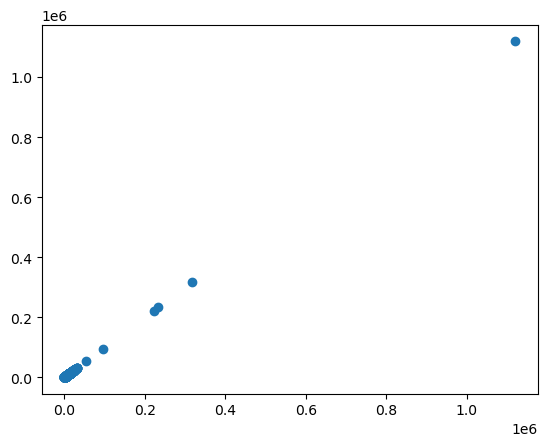

In [11]:
plt.scatter(data.total, data.total)

In [12]:
data.sort_values(by=['total'], ascending=False)['total']

255      1120000
6645      316900
6230      233200
2859      222100
2928       95610
          ...   
10218        545
8183         509
5152         508
5876         507
10627        499
Name: total, Length: 10334, dtype: int64

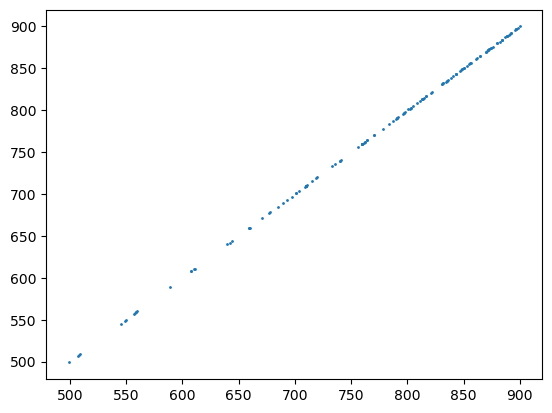

In [13]:
# outliers menores

part_data = data[data.total <= 900]
plt.scatter(part_data.total, part_data.total, s=1)

Podemos notar que temos alguns outliers na coluna 'total', iremos manter todos os outliers com total entre 750 e 20000:

In [14]:
data = data[data.total.between(750, 20000)]

data.sort_values(by=['total'], ascending=False)['total']

428     19990
5278    19940
9452    19940
3716    19890
4008    19860
        ...  
3702      760
7553      760
216       760
960       760
4850      756
Name: total, Length: 10162, dtype: int64

Agora iremos investigar a coluna 'area' por outliers:

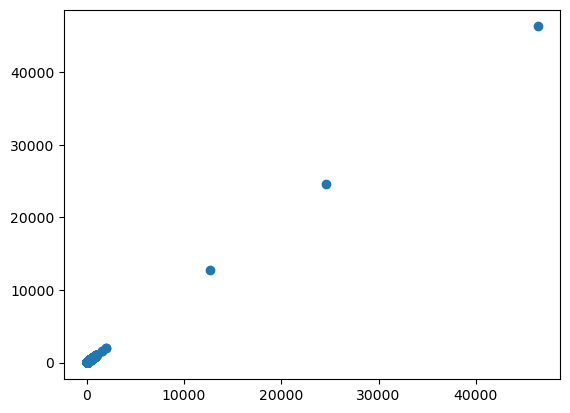

In [15]:
plt.scatter(data.area, data.area)

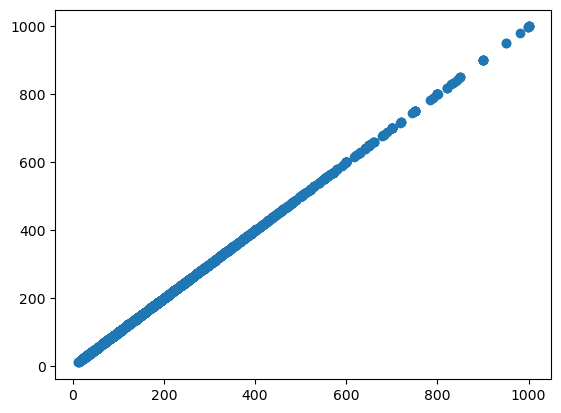

In [16]:
part_data = data[data.area <= 1000]
plt.scatter(part_data.area, part_data.area)

Podemos observar mais outliers na coluna 'area', iremos remover todos os outliers com area maior que 800:

In [17]:
data = data[data.area <= 800]

data.sort_values(by=['area'])['area']

785       11
6784      12
1588      13
4864      13
340       15
        ... 
10380    800
7606     800
5949     800
8858     800
2747     800
Name: area, Length: 10125, dtype: int64

## Salvar dados tratados para as próximas etapas

In [18]:
data.to_csv('../csv-data/tratado_houses_to_rent_v2.csv', index=False)

Agora que temos nossos dados tratados e salvos, iremos continuar com o processo de exploração de dados no próximo notebook, durante a exploração, poderemos notar novos pontos de tratamento de dados que devemos nos atentar, logo, este notebook serve para demonstrar um tratamento inicial dos dados.